In [11]:
import os
import re

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
image_fp = '../data/NaKATPase/Dapi_dapi_NaKATPase_cy3_CD8_cy5_F_1199_07_S007_P006_Z00_cy3.png'

## convert one channel grayscale to three channel grayscale

(2160, 2560)


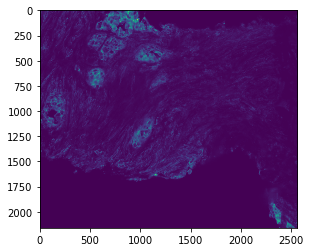

In [13]:
gray_image = cv2.imread(image_fp, cv2.IMREAD_GRAYSCALE)

print(gray_image.shape)

plt.imshow(gray_image)

(2160, 2560, 3)


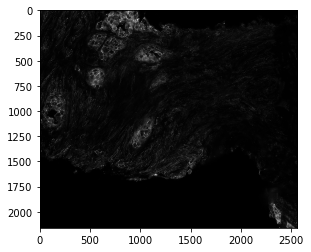

In [17]:
rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

print(rgb_image.shape)

plt.imshow(rgb_image)

## chop image up into pieces

In [18]:
row_size = 512
col_size = 512

In [21]:
images = []

prev_r = 0
prev_c = 0
for i, r in enumerate(range(0, rgb_image.shape[0], row_size)):
    for j, c in enumerate(range(0, rgb_image.shape[1], col_size)):
        if r and c:
            images.append(((i, j), rgb_image[prev_r:r, prev_c:c, :]))
        prev_c = c
    prev_r = r

In [25]:
len(images)

16

In [52]:
def chop_image(rgb_image, row_size=512, col_size=512):
    images = {}

    prev_r = 0
    prev_c = 0
    for i, r in enumerate(range(0, rgb_image.shape[0], row_size)):
        for j, c in enumerate(range(0, rgb_image.shape[1], col_size)):
            if r and c:
                images[(i, j)] = rgb_image[prev_r:r, prev_c:c, :]
            prev_c = c
        prev_r = r
        
    return images

## view side by side

In [62]:
dapi_image_fp = '../data/dapi_processed/Dapi_dapi_NaKATPase_cy3_CD8_cy5_F_1199_07_S007_P005_Z00_dapi/Dapi_dapi_NaKATPase_cy3_CD8_cy5_F_1199_07_S007_P005_Z00_dapi_1_5.png'
NaKATPase_image_fp = '../data/NaKATPase_processed/Dapi_dapi_NaKATPase_cy3_CD8_cy5_F_1199_07_S007_P005_Z00_cy3/Dapi_dapi_NaKATPase_cy3_CD8_cy5_F_1199_07_S007_P005_Z00_cy3_1_5.png'


In [73]:
# convert to 3 channels
gray_image = cv2.imread(dapi_image_fp, cv2.IMREAD_GRAYSCALE)
dapi_rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
dapi_blue_image = cv2.cvtColor(dapi_rgb_image, cv2.COLOR_BGR2HSV)

gray_image = cv2.imread(NaKATPase_image_fp, cv2.IMREAD_GRAYSCALE)
NaKATPase_rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

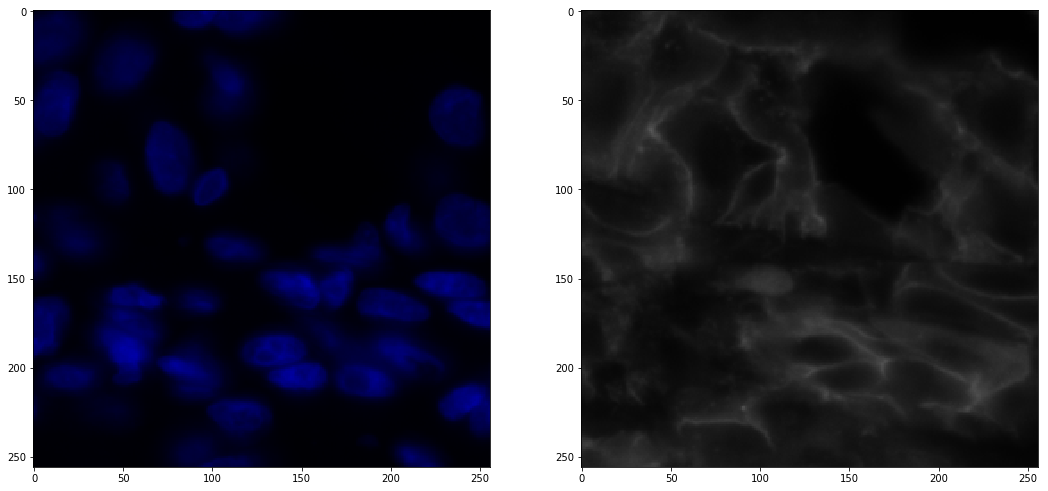

In [74]:
fig, axs = plt.subplots(1,2, figsize=(18,18))
axs[0].imshow(dapi_blue_image)
axs[1].imshow(NaKATPase_rgb_image)

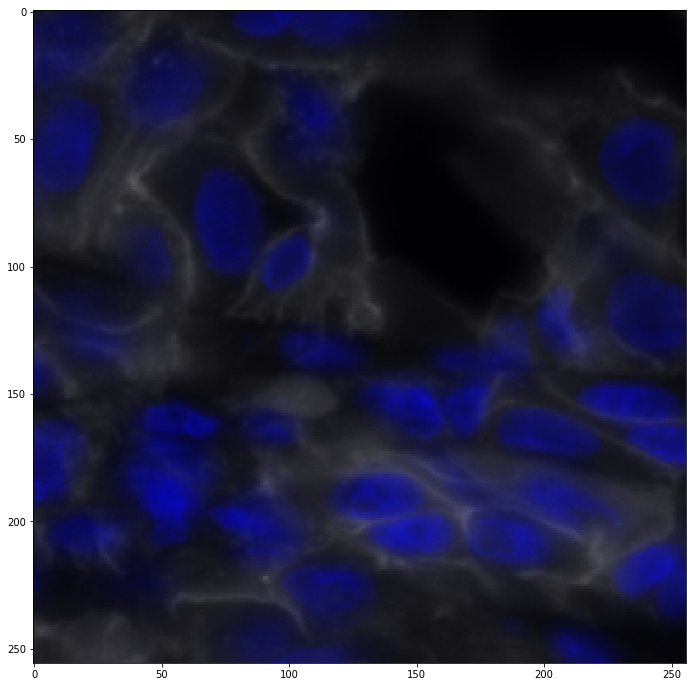

In [86]:
img = cv2.addWeighted(dapi_blue_image, 0.3, NaKATPase_rgb_image, 0.7, 0)
img = cv2.add(dapi_blue_image, NaKATPase_rgb_image)

plt.figure(figsize = (12,12))
plt.imshow(img)
plt.imsave('test.png', img)

## run individual grayscale and chop workflow

In [104]:
input_images_dir = '../data/dapi/'
output_images_dir = '../data/dapi_processed'

# input_images_dir = '../data/NaKATPase/'
# output_images_dir = '../data/NaKATPase_processed'

In [105]:
## make output directory
os.mkdir(output_images_dir)

FileExistsError: [Errno 17] File exists: '../data/dapi_processed'

In [106]:
input_image_fps = [os.path.join(input_images_dir, fp)
               for fp in os.listdir(input_images_dir)]

len(input_image_fps), input_image_fps[:5]

(3,
 ['../data/dapi/F_1199_07_p006.png',
  '../data/dapi/F_1199_07_p004.png',
  '../data/dapi/F_1199_07_p005.png'])

In [107]:
for image_fp in input_image_fps:
    image_id = image_fp.split('/')[-1].replace('.png', '')
    
    # make output dir
    if not os.path.isdir(os.path.join(output_images_dir, image_id)):
        os.mkdir(os.path.join(output_images_dir, image_id))
    
    # convert to 3 channels
    gray_image = cv2.imread(image_fp, cv2.IMREAD_GRAYSCALE)
    rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
    
    # split up image
    location_to_image_chunks = chop_image(rgb_image, row_size=256, col_size=256)
    
    for (i, j), image_chunk in location_to_image_chunks.items():
        plt.imsave(os.path.join(output_images_dir, image_id, f'{image_id}_{i}_{j}.png'), image_chunk)

## run combined grayscale and chop workflow


In [93]:
dapi_input_images_dir = '../data/dapi/'
nakatpase_input_images_dir = '../data/NaKATPase/'

output_images_dir = '../data/dapi_NaKATPase_combined_processed'

In [94]:
## make output directory
os.mkdir(output_images_dir)

FileExistsError: [Errno 17] File exists: '../data/dapi_NaKATPase_combined_processed'

In [97]:
dapi_input_image_fps = sorted([os.path.join(dapi_input_images_dir, fp)
               for fp in os.listdir(dapi_input_images_dir)])

len(dapi_input_image_fps), dapi_input_image_fps[:5]

(3,
 ['../data/dapi/F_1199_07_p004.png',
  '../data/dapi/F_1199_07_p005.png',
  '../data/dapi/F_1199_07_p006.png'])

In [98]:
nakatpase_input_image_fps = sorted([os.path.join(nakatpase_input_images_dir, fp)
               for fp in os.listdir(nakatpase_input_images_dir)])

len(nakatpase_input_image_fps), nakatpase_input_image_fps[:5]

(3,
 ['../data/NaKATPase/F_1199_07_p004.png',
  '../data/NaKATPase/F_1199_07_p005.png',
  '../data/NaKATPase/F_1199_07_p006.png'])

In [99]:
for dapi_fp, nakatpase_fp in zip(dapi_input_image_fps, nakatpase_input_image_fps):
    image_id = dapi_fp.split('/')[-1].replace('.png', '')
    
    # make output dir
    if not os.path.isdir(os.path.join(output_images_dir, image_id)):
        os.mkdir(os.path.join(output_images_dir, image_id))
    
    # convert to 3 channels
    gray_image = cv2.imread(dapi_fp, cv2.IMREAD_GRAYSCALE)
    dapi_rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
    gray_image = cv2.imread(nakatpase_fp, cv2.IMREAD_GRAYSCALE)
    nakatpase_rgb_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
    
    # split up image
    dapi_location_to_image_chunks = chop_image(dapi_rgb_image, row_size=256, col_size=256)
    nakatpase_location_to_image_chunks = chop_image(nakatpase_rgb_image, row_size=256, col_size=256)
    
    for (i, j) in dapi_location_to_image_chunks.keys():
        dapi_image_chunk = dapi_location_to_image_chunks[(i, j)]
        nakatpase_image_chunk = nakatpase_location_to_image_chunks[(i, j)]
        
        dapi_blue_image = cv2.cvtColor(dapi_image_chunk, cv2.COLOR_BGR2HSV)
        img = cv2.add(dapi_blue_image, nakatpase_image_chunk)
        
        plt.imsave(os.path.join(output_images_dir, image_id, f'{image_id}_{i}_{j}.png'), img)